# Number-of-studies-in-inclusion-and-exclusion

    - Using parsed results from Facebook Clinical-Trial-Parser

## 1. Importing and exploring parsed results 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('ie_parsed_clinical_trials.tsv',sep='\t')
df.shape

(23984, 9)

In [3]:
df.head()

,#nct_id,eligibility_type,criterion,label,term,ner_score,concepts,tree_numbers,nel_score
0,NCT01306084,inclusion,Must have (or be suspected of having) a viral ...,word_scores:chronic_disease,viral infection,0.781,Virus Diseases,C01.925,1.0
1,NCT01306084,exclusion,Patients who are unable to safely undergo stud...,word_scores:treatment,study procedures,0.764,NaN,NaN,NaN
2,NCT01306084,exclusion,Pregnant Women,word_scores:pregnancy,pregnant women,1.000,Pregnant Women,M01.975.807,1.0
3,NCT01306084,exclusion,Pregnant women are eligible to participate in ...,word_scores:gender,are,0.997,NaN,NaN,NaN
4,NCT01306084,exclusion,Pregnant women are eligible to participate in ...,word_scores:gender,NaN,0.985,NaN,NaN,NaN


In [4]:
df['#nct_id'].nunique()

1833

There are 1833 unique trials in the parsed result

In [5]:
df.columns

Index(['#nct_id', 'eligibility_type', 'criterion', 'label', 'term',
       'ner_score', 'concepts', 'tree_numbers', 'nel_score'],
      dtype='object')

Getting a subset based on a unique group of '#nct_id', 'eligibility_type', 'concepts' columns

In [6]:
df = df.drop_duplicates(subset=['#nct_id', 'eligibility_type','concepts'])
df = df.dropna(subset=['concepts'])
df.shape

(13180, 9)

###  2. Combining some concepts

Combine MEN

In [7]:
df.concepts = df.concepts.replace('Men|Multiple Endocrine Neoplasia Type 2a|Multiple Endocrine Neoplasia Type 2b','Men')

Combine Immunosuppression

In [8]:
df.concepts = df.concepts.replace('Immunosuppression|Immunosuppression (Physiology)','Immunosuppression')

Combine Pregnancy

In [9]:
df[df.concepts.str.contains('Pregnancy')].concepts.value_counts()

Pregnancy                          773
Pregnancy Tests                    126
Pregnancy, Unplanned                 3
Pregnancy, Multiple                  1
Hypertension, Pregnancy-Induced      1
Name: concepts, dtype: int64

In [10]:
df.concepts = df.concepts.replace('Pregnancy, Unplanned','Pregnancy')
df.concepts = df.concepts.replace('Pregnancy, Multiple','Pregnancy')

In [11]:
df[df.concepts.str.contains('Pregnancy')].concepts.value_counts()

Pregnancy                          777
Pregnancy Tests                    126
Hypertension, Pregnancy-Induced      1
Name: concepts, dtype: int64

Combine Diabetes

In [12]:
df[df.concepts.str.contains('Diabetes')].concepts.value_counts()

Diabetes Mellitus                                      101
Diabetes Mellitus, Type 1|Diabetes Mellitus, Type 2     14
Diabetes Mellitus, Type 1                                4
Diabetes Mellitus, Type 2                                2
Diabetes Insipidus                                       1
Name: concepts, dtype: int64

In [13]:
df.concepts = df.concepts.replace('.*Diabetes.*','Diabetes',regex=True)

In [14]:
df[df.concepts.str.contains('Diabetes')].concepts.value_counts()

Diabetes    122
Name: concepts, dtype: int64

Combine hypertension

In [15]:
df[df.concepts.str.contains('Hypertension')].concepts.value_counts()

Hypertension                                                                                                             79
Hypertension, Pulmonary                                                                                                  18
Hypertension, Portal                                                                                                      6
Intracranial Hypertension                                                                                                 3
Familial Primary Pulmonary Hypertension|Idiopathic Pulmonary Arterial Hypertension|Pulmonary Hypertension, Primary, 1     2
Hypertension, Malignant                                                                                                   1
Hypertension, Pregnancy-Induced                                                                                           1
Name: concepts, dtype: int64

In [16]:
df.concepts = df.concepts.str.replace('.*Hypertension.*','Hypertension',regex=True)

In [17]:
df[df.concepts.str.contains('Hypertension')].concepts.value_counts()

Hypertension    110
Name: concepts, dtype: int64

Combine Liver disease

In [18]:
df[df.concepts.str.contains('Liver Diseases')].concepts.value_counts()

Liver Diseases               70
Liver Diseases, Alcoholic     1
Name: concepts, dtype: int64

In [19]:
df.concepts = df.concepts.str.replace('.*Liver Diseases.*','Liver Diseases',regex=True)

In [20]:
df[df.concepts.str.contains('Liver Diseases')].concepts.value_counts()

Liver Diseases    71
Name: concepts, dtype: int64

Combine Obesity

In [21]:
df[df.concepts.str.contains('Obesity')].concepts.value_counts()

Obesity|Obesity Management|Obesity, Morbid    32
Obesity, Morbid                                5
Name: concepts, dtype: int64

In [22]:
df.concepts = df.concepts.str.replace('.*Obesity.*','Obesity',regex=True)

In [23]:
df[df.concepts.str.contains('Obesity')].concepts.value_counts()

Obesity    37
Name: concepts, dtype: int64

Combine CKD

In [24]:
df.concepts = df.concepts.str.replace('Renal Insufficiency, Chronic','Chronic Kidney Diseases',regex=False)

In [25]:
df[df.concepts.str.contains('Chronic Kidney Diseases')].concepts.value_counts()

Chronic Kidney Diseases    86
Name: concepts, dtype: int64

Change 'Kidney', 'Kidney Failure' as 'Kidney Diseases'

In [26]:
df[df.concepts.str.contains('Kidney')].concepts.value_counts()

Chronic Kidney Diseases    86
Kidney                     74
Kidney Failure             42
Kidney Failure, Chronic    33
Kidney Diseases            22
Acute Kidney Injury         8
Kidney Transplantation      5
Kidney Calculi              4
Kidney Failure, Acute       3
Solitary Kidney             1
Name: concepts, dtype: int64

In [27]:
df.concepts = df.concepts.str.replace('.*Kidney Failure.*','Kidney Diseases')

In [28]:
df[df.concepts.str.contains('Kidney')].concepts.value_counts()

Kidney Diseases            100
Chronic Kidney Diseases     86
Kidney                      74
Acute Kidney Injury          8
Kidney Transplantation       5
Kidney Calculi               4
Solitary Kidney              1
Name: concepts, dtype: int64

In [29]:
for i,row in df.iterrows():
    if(row['concepts'] == 'Kidney'):
        df.loc[i,'concepts'] = 'Kidney Diseases'

In [30]:
df[df.concepts.str.contains('Kidney')].concepts.value_counts()

Kidney Diseases            174
Chronic Kidney Diseases     86
Acute Kidney Injury          8
Kidney Transplantation       5
Kidney Calculi               4
Solitary Kidney              1
Name: concepts, dtype: int64

Delete Respiratory Rate

In [31]:
df[df.concepts.str.contains('Respiratory Rate')].concepts.value_counts()

Respiratory Rate    104
Name: concepts, dtype: int64

In [32]:
df = df[~df.concepts.str.contains('Respiratory Rate')]

In [33]:
df.shape

(13076, 9)

## 3. Spliting inclusion and exclusion criteria

In [34]:
df1 = df[df.eligibility_type == 'exclusion']
df1.shape

(9462, 9)

In [35]:
df2 = df[df.eligibility_type == 'inclusion']
df2.shape

(3614, 9)

In [36]:
df1.concepts.value_counts()[:30]

Pregnancy                                    717
Women                                        331
Therapeutics                                 204
Kidney Diseases                              153
Cancer                                       136
COVID-19                                     131
Hydroxychloroquine                           127
HIV|HIV Infections                           120
Ventilation, Mechanical                      101
Chloroquine                                   76
Dialysis                                      71
Pregnancy Tests                               71
Glucosephosphate Dehydrogenase Deficiency     70
Myocardial Infarction                         70
Mycoses                                       70
Liver Diseases                                69
Hypertension                                  69
Immunosuppression                             68
Hepatitis B                                   67
Chronic Kidney Diseases                       67
Extracorporeal Membr

In [37]:
df2.concepts.value_counts()[:30]

COVID-19                                  448
Women                                     289
Men                                       273
Polymerase Chain Reaction                 116
Pneumonia                                 100
Diabetes                                   66
Therapeutics                               65
Ventilation, Mechanical                    61
Pregnancy                                  60
Pregnancy Tests                            55
Dyspnea                                    50
Infections                                 50
Respiratory Distress Syndrome, Adult       49
Respiratory Failure                        43
Hypertension                               41
Cancer                                     38
Fever|Hyperthermia, Induced                37
Obesity                                    31
Noninvasive Ventilation                    28
Pulmonary Disease, Chronic Obstructive     26
Cardiovascular Diseases                    25
Pregnant Women                    

Text(0.5, 1.0, 'Number of studies using the exclusion criterion')

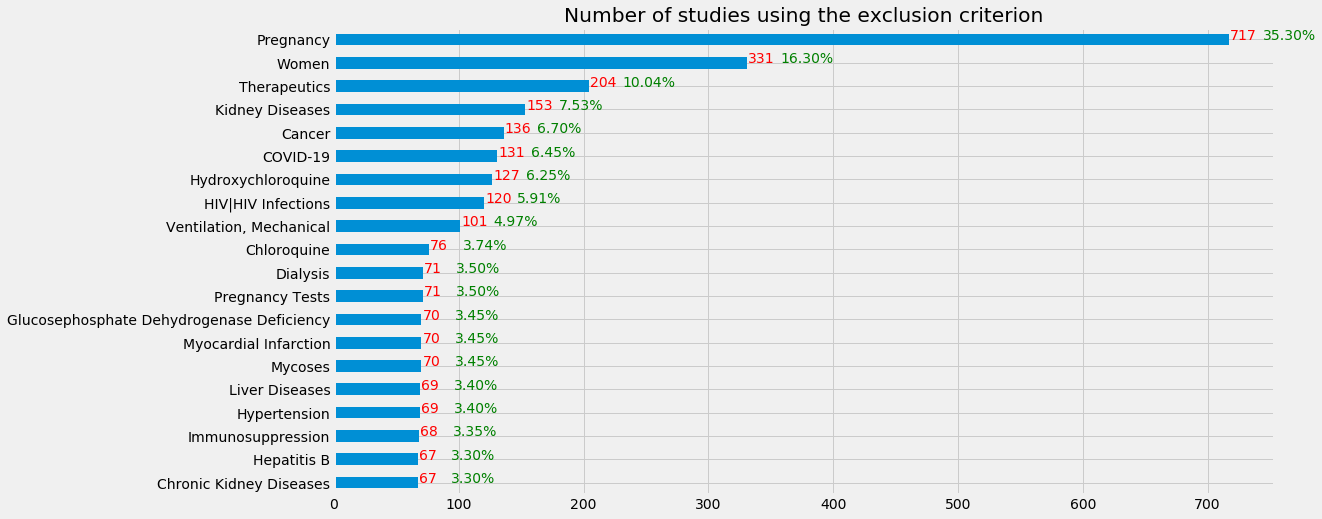

In [38]:
fig1 = plt.figure(figsize=(15,8))
df1.concepts.value_counts()[:20][::-1].plot.barh()
for i,v in enumerate(df1.concepts.value_counts()[:20][::-1]):
    plt.text(v + 1, i , str(v), color = 'red')
    plt.text(v + 27, i , ("{:.2%}".format(v/2031)), color = 'green')
plt.title('Number of studies using the exclusion criterion')

In [39]:
# fig1.savefig("./data/Concept_frequency_in_exclusion.png", dpi=300, bbox_inches = "tight")

Text(0.5, 1.0, 'Number of studies using the inclusion criterion')

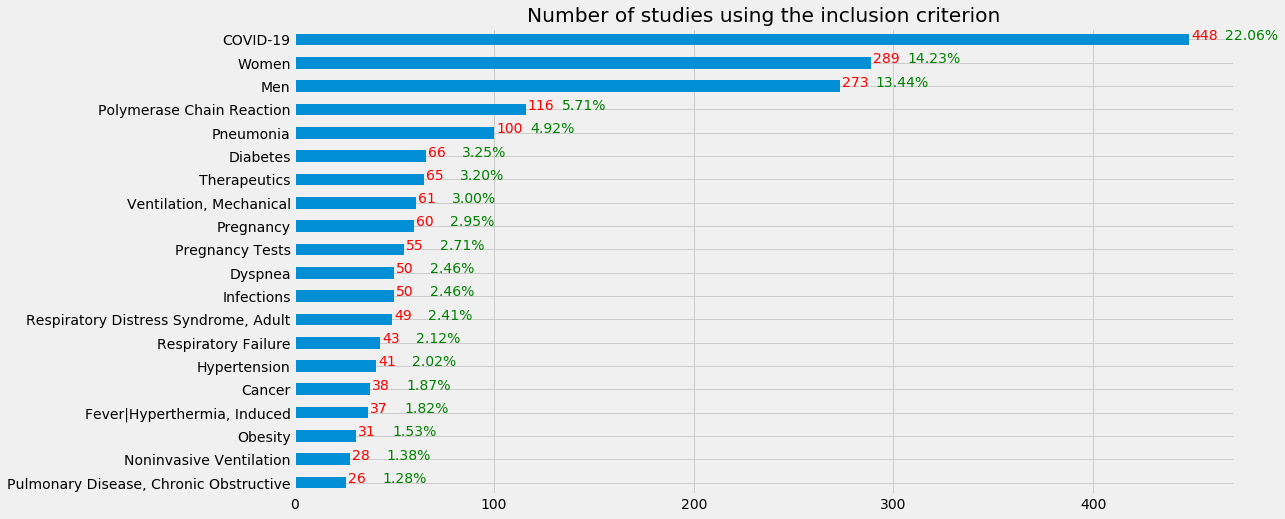

In [40]:
fig2 = plt.figure(figsize=(15,8))
df2.concepts.value_counts()[:20][::-1].plot.barh()
for i,v in enumerate(df2.concepts.value_counts()[:20][::-1]):
    plt.text(v + 1, i , str(v), color = 'red')
    plt.text(v + 18, i , ("{:.2%}".format(v/2031)), color = 'green')
plt.title('Number of studies using the inclusion criterion')

In [41]:
# fig2.savefig("./data/Concept_frequency_in_inclusion.png", dpi=300, bbox_inches = "tight")